In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys,os
import pandas as pd
path_to_utilsGRF_="/Users/rosamartinezcorral/Dropbox (HMS)/backup_crg/repos/shared/utilsGRF" #GeneRegulatoryFunctions repo
sys.path.append(path_to_utilsGRF_)
import alphashape
import BoundaryFinder as BF
from matplotlib.gridspec import GridSpec
from shapely.geometry import Point, Polygon

In [3]:
folder="../boundaryanalysis_notebooks/ashapes"
s0="ashape_N4univ_3_2022_8_23.npy" #center region
#s0="ashape_N4univcenter_3_2023_5_11.npy" #center region, recomputed 5/2023
s1="ashape_N4univ_biggergrid_3_2022_8_23.npy" #analyse_boundaries_N4univ_allregion_(biggergrid)
s2="ashape_N4univ_lr005_3_2023_5_11.npy" #converged. analyse_boundaries_N4univ_lr_005
s4="ashape_N4univ_ul005_3_2023_5_11.npy" #converged. analyse_boundaries_N4univ_ul_005
s0=np.load(os.path.join(folder,s0))
s1=np.load(os.path.join(folder,s1))
s2=np.load(os.path.join(folder,s2))
s4=np.load(os.path.join(folder,s4))

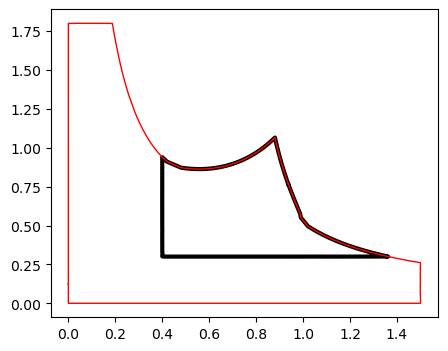

In [3]:
#note that the boundary calculated with grid 0.005 and 0.01 overlaps perfectly (in the region where it can overlap)
fig,ax=plt.subplots(1,1,figsize=(5,4))
ax.plot(s0[0],s0[1],color="k",linewidth=3)
ax.plot(s1[0],s1[1],color="r",linewidth=1)
plt.show()

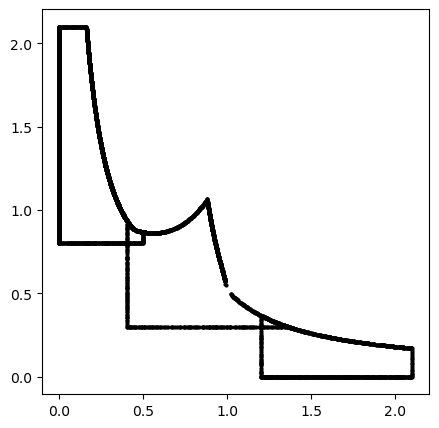

In [4]:
allpoints=[]
for s in [s0,s2,s4]:
    for i in range(len(s[0])):
        if True: #s[0][i]<10 and s[1][i]<5:
            allpoints.append((s[0][i],s[1][i]))
x=np.array([allpoints[i][0] for i in range(len(allpoints))])
y=np.array([allpoints[i][1] for i in range(len(allpoints))])

fig,ax=plt.subplots(1,1,figsize=(5,5))
ax.scatter(x,y,s=4,color="k")
#ax.plot(s1[0],s1[1],color="b")
plt.show()

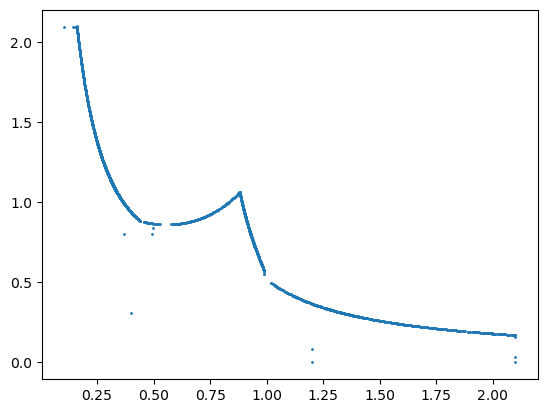

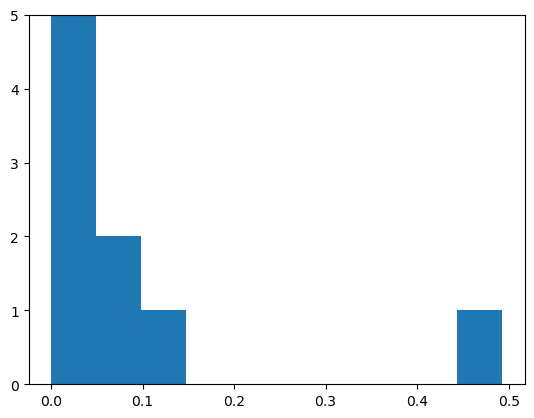

In [5]:

points=np.vstack((x,y)).transpose()
mask=np.ones(len(points),dtype=bool)

tol=1e-4

#remove vertical lines
for idx in range(len(x)):
    xp=x[idx]
    yp=y[idx]
    if xp<max(y):
        samep=np.where(np.abs(x-xp)<tol)[0]
        stp=y[samep]
        argsort=np.argsort(stp)
        idxs_remove=np.arange(len(x))[samep[argsort[:-1]]]
        mask[idxs_remove]=False
points=points[mask]
#now remove horizontal ones
mask=np.ones(len(points),dtype=bool)
x=points[:,0]
y=points[:,1]
for idx in range(len(x)):
    xp,yp=points[idx]
    stp=yp
    if yp<max(y):
        samestp=np.where(np.abs(y-yp)<tol)[0]
        pos=x[samestp]
        argsort=np.argsort(pos)
        idxs_remove=np.arange(len(x))[samestp[argsort[:-1]]]
        mask[idxs_remove]=False
    
points=points[mask]
    
plt.scatter(points[:,0],points[:,1],s=1)
plt.show()
#finally remove the points that do not have a nearby point



min_distances=[]
for idx in range(len(points)):
    xp,yp=points[idx]
    stp=yp
    
    mask_other=np.ones(len(points),dtype=bool)
    mask_other[idx]=False
    dist_x=points[mask_other][:,0]-xp
    dist_y=points[mask_other][:,1]-yp
    distances=np.sqrt(dist_x**2+dist_y**2)
    min_distances.append(min(distances))
plt.hist(min_distances)
plt.ylim(0,5)
plt.show()


            
            
    

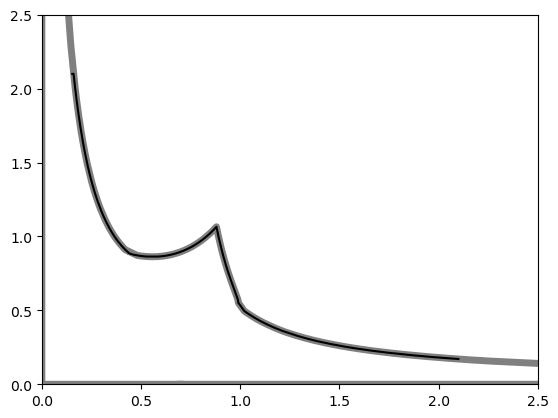

In [6]:
#remove the few that are left floating around based on distance
#doublecheck that it matches what we had obtained originally
old_ashape=np.load("../boundaryanalysis_notebooks/ashapes/N4univ_allregion_10_10_stitched_2022_8_23.npy")
min_distances=np.array(min_distances)      
mask=np.ones(len(points),dtype=bool)
mask[min_distances>0.01]=False
points=points[mask]
plt.plot(old_ashape[0],old_ashape[1],color="gray",linewidth=5)
argsort=np.argsort(points[:,0])
plt.scatter(points[:,0],points[:,1],s=1)
plt.plot(points[:,0][argsort],points[:,1][argsort],color="k")
plt.xlim(0,2.5)
plt.ylim(0,2.5)
plt.show()

Note that we get exactly the same as we had before. I could just add the corners to the black line so that I can plot it as x,y.

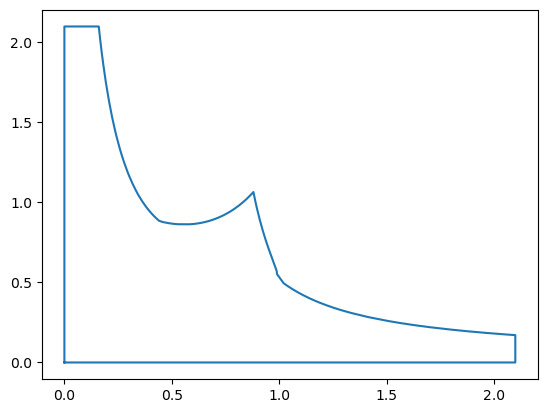

In [7]:

x=points[:,0]
sort_p=np.argsort(x)
y=points[:,1]
max_s=max(y)
all_x=[0,0]+list(x[sort_p])+[max(x),0]
all_y=[0,max_s]+list(y[sort_p])+[0,0]
plt.plot(all_x,all_y)
plt.show()

In [8]:
np.save("../boundaryanalysis_notebooks/ashapes/N4univ_allregion_2_2_stitched_2023_5_11.npy",np.vstack((all_x,all_y)))